### 🧠 Clasificadores Bayesianos: Teoría Breve

Los clasificadores bayesianos se basan en el **Teorema de Bayes**, el cual permite calcular la probabilidad posterior de una clase dada una observación \( x \). Se expresa de la siguiente forma:

$$
P(C_k \mid x) = \frac{P(x \mid C_k) \cdot P(C_k)}{P(x)}
$$

**Donde:**

$P(C_k \mid x)$: Probabilidad posterior de que la observación $ x $ pertenezca a la clase $ C_k $,

$P(x \mid C_k)$: Verosimilitud, es decir, la probabilidad de observar $ x $ dado que pertenece a la clase $ C_k $,

$ P(C_k)$      : Probabilidad previa de la clase $ C_k $,

$ P(x) $       : Probabilidad total de observar $ x $ (es constante para todas las clases).


**Para clasificar una nueva observación, se escoge la clase con mayor probabilidad a posteriori.**


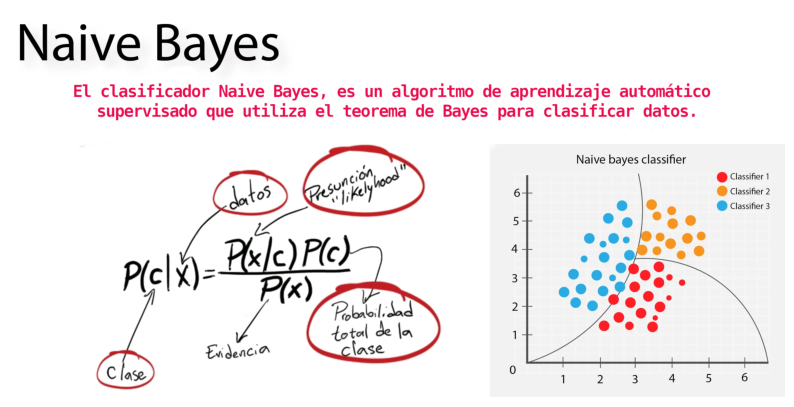

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/NaiveBayes.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

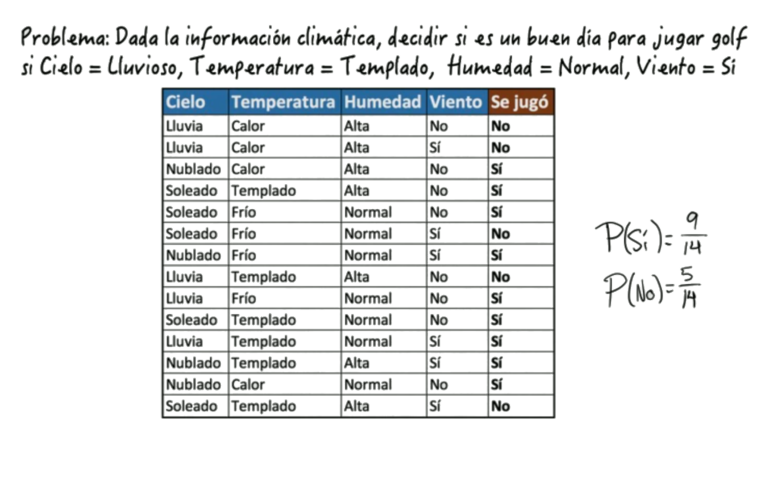

In [2]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/BayesEj_1.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

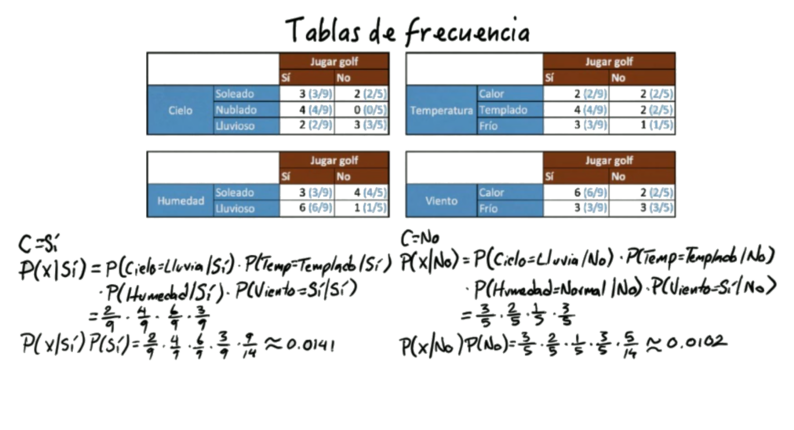

In [3]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/BayesEj_2.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

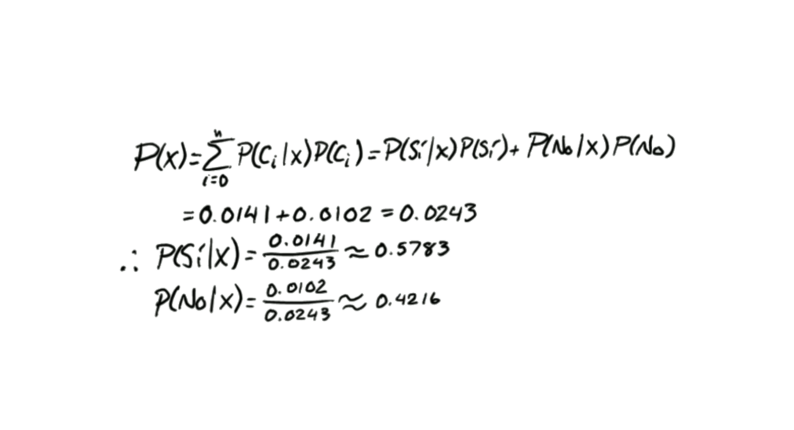

In [4]:
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/BayesEj_3.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

In [36]:
# 1. Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [73]:
# 2. Cargamos el dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separar X (características) e y (etiqueta) usando .drop()
X = df.drop('target', axis=1)
y = df['target']
#X.columns

In [53]:
# 2-1 Agregar ruido gaussiano: media=0, std=0.5
np.random.seed(42)  # para reproducibilidad
noise = np.random.normal(loc=0.0, scale=2, size=X.shape)
X = X + noise  # nueva base con ruido

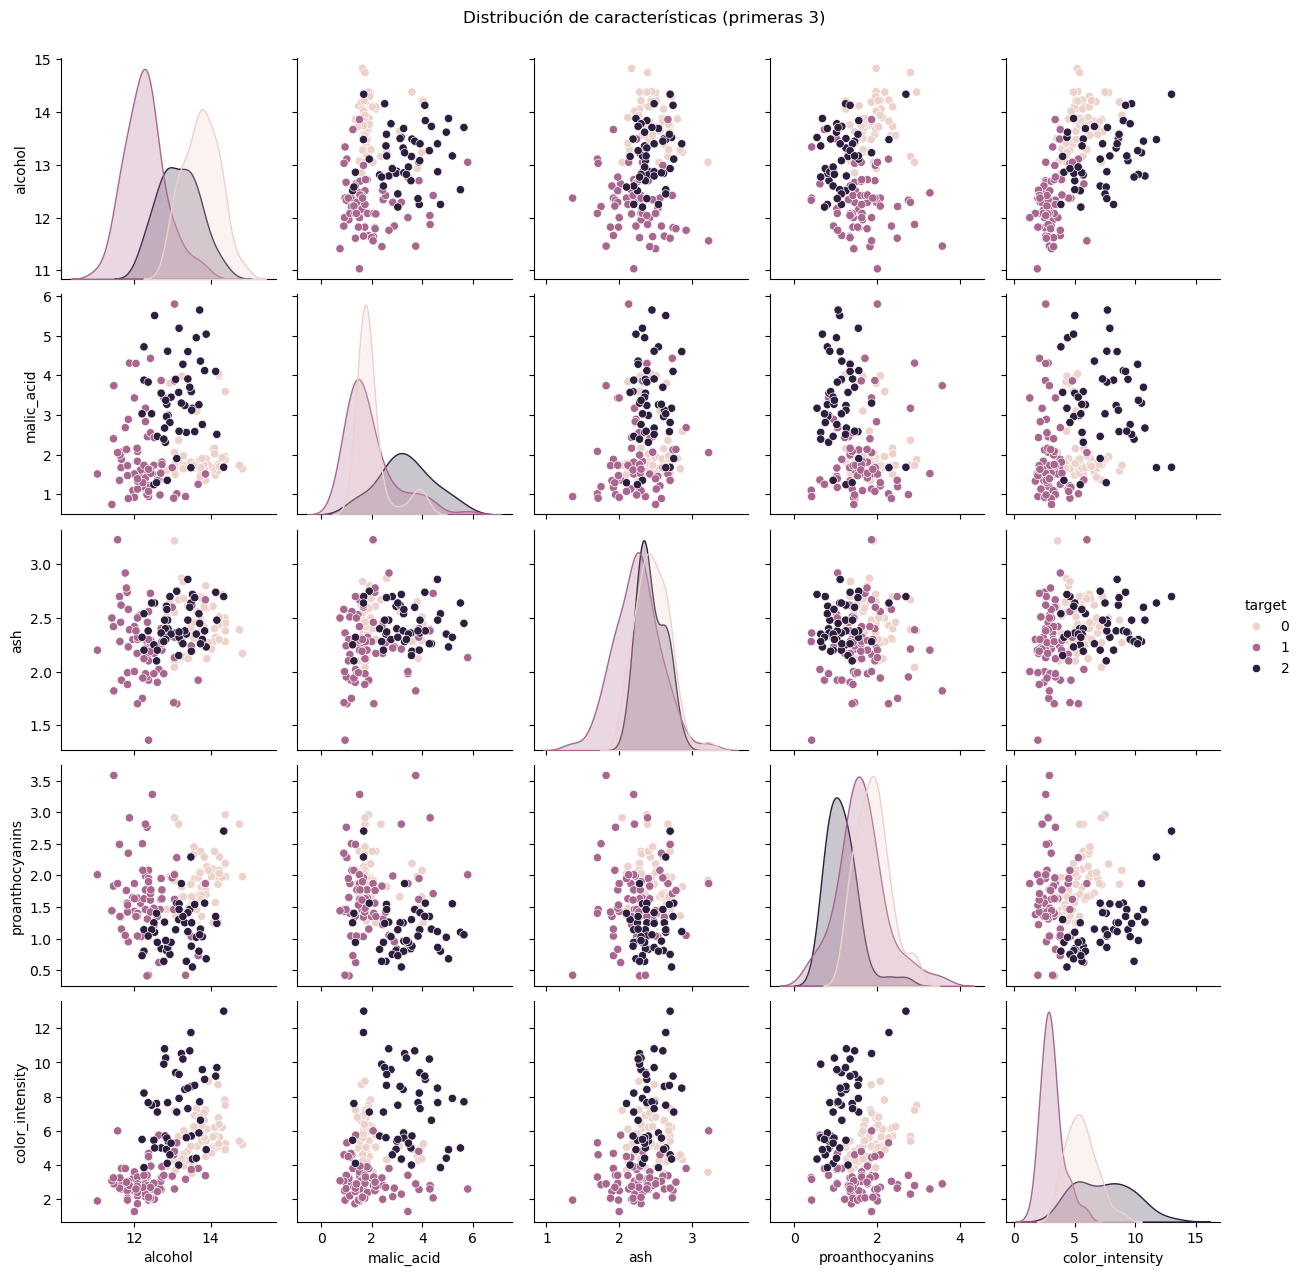

In [74]:
# 3. Exploramos brevemente los datos

pairplot = sns.pairplot(df[['alcohol', 'malic_acid', 'ash','proanthocyanins', 'color_intensity','target']], hue='target')
plt.suptitle("Distribución de características (primeras 3)", y=1.02)
plt.show()

In [75]:
# 4. Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# 5. Creamos y entrenamos el modelo
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [77]:
# 6. Hacemos predicciones
y_pred = model.predict(X_test)

📊 Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



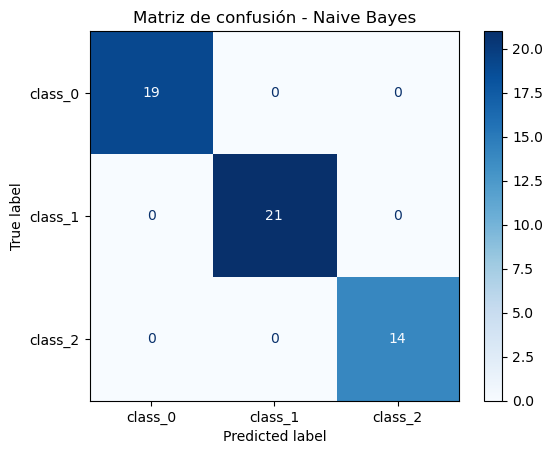

In [78]:
# 7. Evaluamos el modelo
print("📊 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap="Blues")
plt.title("Matriz de confusión - Naive Bayes")
plt.show()

In [103]:
# predicción Manual:

nuevo_dato = np.array([[1.52234283e+01, 1.43347140e+00, 3.72537708e+00, 1.86460597e+01,
       1.26531693e+02, 2.33172609e+00, 6.21842563e+00, 1.81486946e+00,
       1.35105123e+00, 6.72512009e+00, 1.13164614e-01, 2.98854049e+00,
       1.06548392e+03]])

In [104]:
model.predict(nuevo_dato)

/home/hans/anaconda3/envs/CursoPython/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [105]:
# Para quitar la advertencia:

# Usar los mismos nombres de las columnas con las que se entrenó
nuevo_dato_df = pd.DataFrame(nuevo_dato, columns=X.columns)

prediccion = model.predict(nuevo_dato_df)
print("Predicción:", prediccion)


Predicción: [1]


## Seleccionamos solo 2 características para poder graficar

In [88]:
X_vis = X.iloc[:, [0, 2]]  # 'alcohol' y 'ash'
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

In [89]:
# Entrenamos un nuevo modelo con sólo esas 2 características
model_vis = GaussianNB()
model_vis.fit(X_vis_train, y_vis_train)

GaussianNB()

In [90]:
# Crear una malla de puntos para graficar la frontera de decisión
h = 0.1  # paso de la malla
x_min, x_max = X_vis_train.iloc[:, 0].min() - 1, X_vis_train.iloc[:, 0].max() + 1
y_min, y_max = X_vis_train.iloc[:, 1].min() - 1, X_vis_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [82]:
# Predecimos sobre todos los puntos del meshgrid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/home/hans/anaconda3/envs/CursoPython/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [91]:
# Para eliminar la advertencia:

# Crear un DataFrame con nombres de columnas antes de predecir
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_vis.columns)
Z = model_vis.predict(grid_points)
Z = Z.reshape(xx.shape)

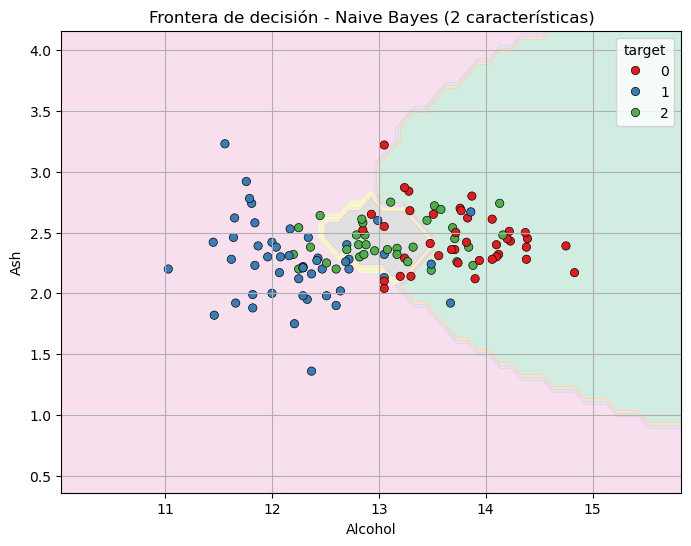

In [92]:
# Graficamos
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.6)
sns.scatterplot(x=X_vis_train.iloc[:, 0], y=X_vis_train.iloc[:, 1], hue=y_vis_train, palette='Set1', edgecolor='k')
plt.xlabel("Alcohol")
plt.ylabel("Ash")
plt.title("Frontera de decisión - Naive Bayes (2 características)")
plt.grid(True)
plt.show()

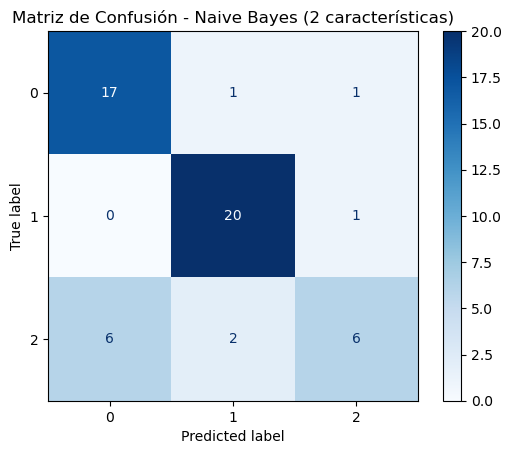

📊 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.87      0.95      0.91        21
           2       0.75      0.43      0.55        14

    accuracy                           0.80        54
   macro avg       0.79      0.76      0.75        54
weighted avg       0.79      0.80      0.78        54



In [93]:
# Predicciones sobre el conjunto de prueba
y_pred_vis = model_vis.predict(X_vis_test)

# Matriz de confusión
cm = confusion_matrix( y_vis_test, y_pred_vis)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes (2 características)")
plt.grid(False)
plt.show()

# Reporte de clasificación
print("📊 Reporte de clasificación:")
print(classification_report( y_vis_test, y_pred_vis))

In [102]:
# Usar los mismos nombres de las columnas 
nuevo_dato_df = pd.DataFrame(nuevo_dato, columns=X.columns)

prediccion = model.predict(nuevo_dato_df)
print("Predicción:", prediccion)

Predicción: [1]
